In [37]:
import cv2 as cv
import numpy as np
import serial
from matplotlib import pyplot as plt


In [25]:
cv.__version__

'4.5.4-dev'

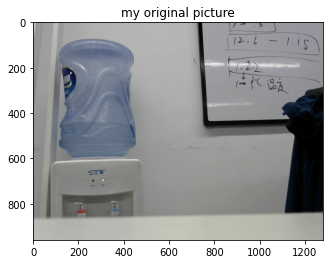

In [50]:
targetImg = cv.imread('3.png')
targetRgbImg = cv.cvtColor(targetImg,cv.COLOR_BGR2RGB)
# name1 = 'pic 1'
# name2 = 'gray pic 1'
# cv.namedWindow(name1,cv.WINDOW_NORMAL)
# cv.namedWindow(name2,cv.WINDOW_NORMAL)
# cv.imshow(name1,targetImg)

# cv.moveWindow(name2,targetImg.shape[0]+ 10, 10)
plt.imshow(targetRgbImg)
plt.title('my original picture')
plt.show()


In [51]:
targetImg

array([[[191, 191, 191],
        [191, 191, 191],
        [192, 192, 192],
        ...,
        [119, 115, 136],
        [107, 104, 127],
        [105, 102, 127]],

       [[191, 191, 191],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [ 98,  92, 122],
        [ 93,  88, 121],
        [101,  96, 129]],

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [ 97,  92, 111],
        [103,  99, 120],
        [118, 114, 135]],

       ...,

       [[184, 187, 186],
        [184, 187, 186],
        [184, 187, 186],
        ...,
        [158, 167, 167],
        [158, 167, 167],
        [158, 167, 167]],

       [[184, 187, 186],
        [184, 187, 186],
        [184, 187, 186],
        ...,
        [159, 168, 168],
        [161, 168, 168],
        [161, 168, 168]],

       [[184, 187, 186],
        [184, 187, 186],
        [184, 187, 186],
        ...,
        [161, 168, 168],
        [163, 168, 168],
        [163, 168, 168]]

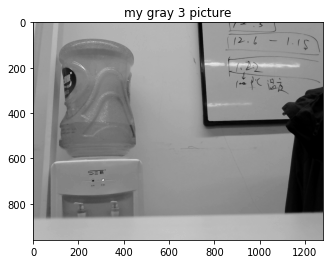

In [53]:
# display gray picture using plt
gray1 = cv.cvtColor(targetImg,cv.COLOR_BGR2GRAY)
#arr = np.asarray(gray1)

plt.imshow(gray1,cmap='gray',vmin=0,vmax=255)
plt.title('my gray 3 picture')
plt.show()

#cv.imshow(name2,gray1)
#cv.waitKey(1)
#cv.destroyWindow(name1)
#cv.destroyWindow(name2)

In [54]:
gray1

array([[191, 191, 192, ..., 122, 111, 110],
       [191, 192, 192, ..., 102,  98, 106],
       [192, 192, 192, ...,  98, 106, 121],
       ...,
       [186, 186, 186, ..., 166, 166, 166],
       [186, 186, 186, ..., 167, 167, 167],
       [186, 186, 186, ..., 167, 167, 167]], dtype=uint8)

In [55]:
gray1.shape

(960, 1280)

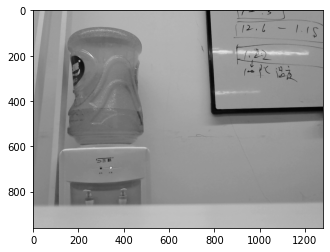

In [49]:
readgray1 = cv.imread('targetImghsv.png')
readgray1.shape
plt.imshow(readgray1)
plt.show()

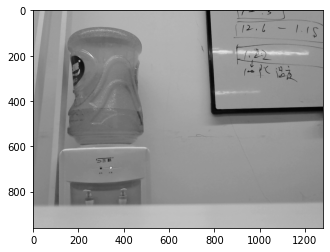

In [48]:
readgray1rgb = cv.cvtColor(readgray1,cv.COLOR_BGR2RGB)
plt.imshow(readgray1rgb)
plt.show()

In [46]:
cvgray1 = cv.imread('targetImghsv_cv.png')
cvgray1.shape

(960, 1280, 3)

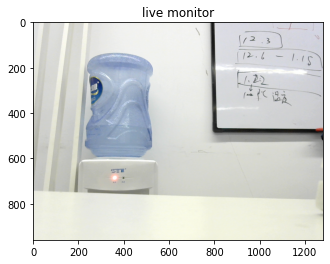

In [11]:
capture = cv.VideoCapture(0)
# monitorWindow = cv.namedWindow('Monitor Window')

hasEnteredFrame = False
i = 1
while i>0:
    hasEnteredFrame = capture.grab()
    if hasEnteredFrame:
        _, currentFrame = capture.retrieve()
        rgbFrame = cv.cvtColor(currentFrame,cv.COLOR_BGR2RGB)
        plt.imshow(rgbFrame)
        plt.title('live monitor')
        plt.show()
#         cv.imshow(monitorWindow,currentFrame)
        keyCode = cv.waitKey(1)
        keyCode &=0xFF
        if keyCode == ord('q'):
#             cv.destroyWindow(monitorWindow)
            break
        i-=1
            
        
        

In [33]:
rgbFrame.shape

(960, 1280, 3)

In [23]:
capture.release()
